In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir Places2

In [ ]:
import shutil 
shutil.unpack_archive("drive/MyDrive/Places2.zip", "Places2/")

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import pathlib

In [ ]:
from os import listdir
data_list = listdir('/content/Places2/Places2')

#Delete some classes that may interfere


data_list

['test', 'train']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATASET_PATH  = '/content/Places2/Places2/train'
test_dir =  '/content/Places2/Places2/test'
IMAGE_SIZE    = (256, 256)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0001 #start off with high rate first 0.001 #5e-4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='nearest')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                 
                                                  )

Found 4651 images belonging to 2 classes.


In [ ]:
validation_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  
                                                 
                                                  )

Found 1162 images belonging to 2 classes.


In [ ]:
SHAPE_INP=(256,256, 3)
input_shape=(None,256,256, 3)
IMG_SIZE=256

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

keras = tf.keras

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
pip install keras --user

In [ ]:
IMG_SHAPE = (256, 256, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape= SHAPE_INP)

In [ ]:
base_model.trainable = False

In [ ]:
from keras import models
from keras import layers

In [ ]:

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2 , activation="softmax"))
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10
validation_steps=5

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 53s 363ms/step - loss: 0.7672 - accuracy: 0.5751


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.77
initial accuracy: 0.56


In [ ]:

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=validation_batches.n//validation_batches.batch_size
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
145/145 [==============================] - 87s 605ms/step - loss: 0.5668 - accuracy: 0.7629 - val_loss: 0.5258 - val_accuracy: 0.7894
Epoch 2/10
145/145 [==============================] - 89s 614ms/step - loss: 0.4702 - accuracy: 0.8279 - val_loss: 0.4762 - val_accuracy: 0.7956
Epoch 3/10
145/145 [==============================] - 88s 610ms/step - loss: 0.4045 - accuracy: 0.8584 - val_loss: 0.4491 - val_accuracy: 0.7982
Epoch 4/10
145/145 [==============================] - 88s 611ms/step - loss: 0.3871 - accuracy: 0.8523 - val_loss: 0.4271 - val_accuracy: 0.8035
Epoch 5/10
145/145 [==============================] - 87s 605ms/step - loss: 0.3535 - accuracy: 0.8690 - val_loss: 0.4203 - val_accuracy: 0.8150
Epoch 6/10
145/145 [==============================] - 87s 606ms/step - loss: 0.3503 - accuracy: 0.8699 - val_loss: 0.4335 - val_accuracy: 0.8018
Epoch 7/10
145/145 [==============================] - 89s 615ms/step - loss: 0.3432 - accuracy: 0.8723 - val_loss: 0.3928 - val_ac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=validation_batches.n//validation_batches.batch_size
history1 = model.fit(train_batches,
                    epochs=40,
                    validation_data=validation_batches,
                    steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
145/145 [==============================] - 87s 600ms/step - loss: 0.3242 - accuracy: 0.8757 - val_loss: 0.3918 - val_accuracy: 0.8354
Epoch 2/40
145/145 [==============================] - 87s 601ms/step - loss: 0.3077 - accuracy: 0.8827 - val_loss: 0.3980 - val_accuracy: 0.8195
Epoch 3/40
145/145 [==============================] - 88s 611ms/step - loss: 0.3121 - accuracy: 0.8775 - val_loss: 0.3867 - val_accuracy: 0.8204
Epoch 4/40
145/145 [==============================] - 87s 606ms/step - loss: 0.3092 - accuracy: 0.8798 - val_loss: 0.3917 - val_accuracy: 0.8283
Epoch 5/40
145/145 [==============================] - 88s 608ms/step - loss: 0.3067 - accuracy: 0.8835 - val_loss: 0.3841 - val_accuracy: 0.8257
Epoch 6/40
145/145 [==============================] - 87s 601ms/step - loss: 0.3023 - accuracy: 0.8820 - val_loss: 0.3692 - val_accuracy: 0.8354
Epoch 7/40
145/145 [==============================] - 87s 603ms/step - loss: 0.3051 - accuracy: 0.8794 - val_loss: 0.4037 - val_ac

In [ ]:
acc += history1.history['accuracy']
val_acc += history1.history['val_accuracy']

loss += history1.history['loss']
val_loss += history1.history['val_loss']

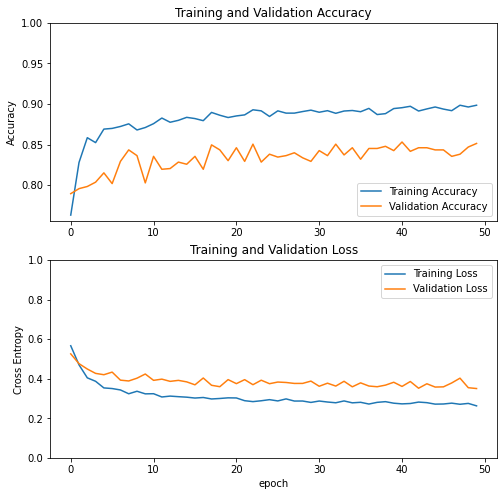

In [ ]:


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=validation_batches.n//validation_batches.batch_size

fine_tune_epochs = 50
total_epochs =  initial_epochs+40 + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1]+ history1.epoch[-1],
                         validation_data=validation_batches,
                         steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 49/100
145/145 [==============================] - 90s 626ms/step - loss: 0.2790 - accuracy: 0.8918 - val_loss: 0.3833 - val_accuracy: 0.8460
Epoch 50/100
145/145 [==============================] - 89s 617ms/step - loss: 0.2586 - accuracy: 0.9006 - val_loss: 0.3821 - val_accuracy: 0.8372
Epoch 51/100
145/145 [==============================] - 87s 603ms/step - loss: 0.2744 - accuracy: 0.8948 - val_loss: 0.3996 - val_accuracy: 0.8212
Epoch 52/100
145/145 [==============================] - 88s 612ms/step - loss: 0.2666 - accuracy: 0.8950 - val_loss: 0.3526 - val_accuracy: 0.8593
Epoch 53/100
145/145 [==============================] - 88s 608ms/step - loss: 0.2688 - accuracy: 0.8952 - val_loss: 0.3849 - val_accuracy: 0.8372
Epoch 54/100
145/145 [==============================] - 89s 615ms/step - loss: 0.2712 - accuracy: 0.8972 - val_loss: 0.3809 - val_accuracy: 0.8381
Epoch 55/100
145/145 [==============================] - 88s 610ms/step - loss: 0.2740 - accuracy: 0.8941 - val_loss: 0

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

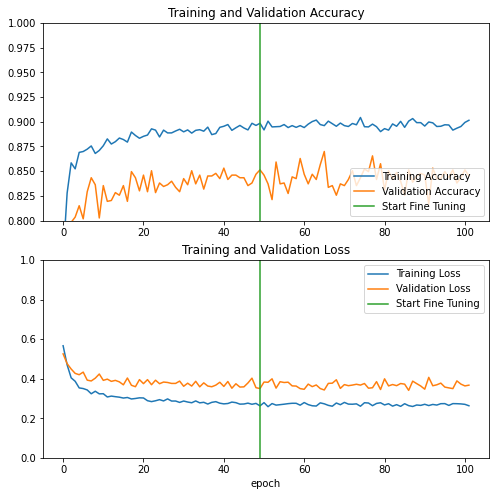

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1+40,initial_epochs-1+40],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1+40,initial_epochs-1+40],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('/content/Places2/Places2/placesMobilnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model.save_weights(filepath='/content/Places2/Places2/newfinal_weightVGGplaces.hdf5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        
        
        class_mode="categorical")
eval_generator.reset()

Found 1454 images belonging to 2 classes.


In [ ]:
eval_generator.reset()  
x = model.evaluate(eval_generator,  
                           steps = np.ceil(len(eval_generator) / 32),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                   )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

46/46 [==============================] - 1s 8ms/step - loss: 0.3584 - accuracy: 0.8696
Test loss: 0.3583948314189911
Test accuracy: 0.8695651888847351


In [ ]:
preds = model.evaluate(eval_generator,batch_size=1,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

1454/1454 [==============================] - 11s 8ms/step - loss: 0.2657 - accuracy: 0.8982
Validation Loss = 0.26572421193122864
Validation Accuracy = 0.8982118368148804


In [ ]:
eval_generator.reset()  
pred = model.predict(eval_generator,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print("Predictions finished")

1454/1454 [==============================] - 13s 7ms/step
Predictions finished


In [ ]:
print(pred)

[[8.9510965e-01 1.0489029e-01]
 [9.9906629e-01 9.3369622e-04]
 [9.9971837e-01 2.8166486e-04]
 ...
 [2.6829261e-02 9.7317070e-01]
 [2.3521809e-03 9.9764782e-01]
 [1.0400147e-04 9.9989593e-01]]


In [ ]:
pred_labels = np.argmax(pred, axis = 1)

In [ ]:
len(eval_generator.classes)

1454

In [ ]:
len(pred_labels)

1454

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(eval_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       702
           1       0.88      0.93      0.90       752

    accuracy                           0.90      1454
   macro avg       0.90      0.90      0.90      1454
weighted avg       0.90      0.90      0.90      1454



In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("/content/Places2/Places2/placesMobilnet.h5")

    # image path
    #img_path = '/content/Places2/Places2/val/indoor/00000003 (3).jpg'   
    img_path = '/content/Places2/Places2/test/indoor/00000014 (2).jpg'     

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict_classes(new_image)

if pred==0:
  print("indoor")
else:
  print("outdoor")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


indoor
